In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")


import data_preprocessing as dp
import metrics
import genetic_algorithm as ga

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel('/content/final_data.xlsx')
data.head()

,Unnamed: 0,Team size**1 x Actual duration**1,Dedicated team members**1 x Actual duration**1,Actual duration**1 x Development environment adequacy**1 x 11-20**1,Team size**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,User resistance**1 x Project manager**1 x 21-30**1,Development environment adequacy**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Actual duration**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Requirment stability**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Dedicated team members**1 x Technical stability**1 x Tool availability**1,...,Dedicated team members**1 x Actual duration**1 x Economic instability impact**1,Technical stability**1 x 21-30**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Actual duration**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Users stability**1 x 1-5**1,Object points**1 x Project manager**1 x >500**1,Team size**1 x Developer**1 x >500**1,Dedicated team members**1 x Users stability**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Team cohesion**1 x Developer incentives policy**1,Requirment stability**1 x Tool availability**1 x 11-20**1,Actual effort
0,0,18.0,18.0,0,0,0.0,0,0,0.0,42,...,18.0,0,18.0,0.0,0,6,11.333333,96,0.000000,3168.0
1,1,9.0,9.0,0,0,0.0,0,0,0.0,24,...,27.0,0,0.0,0.0,0,0,0.000000,108,0.000000,1584.0
2,2,30.0,30.0,0,0,0.0,0,0,0.0,48,...,60.0,0,0.0,0.0,0,0,0.000000,180,0.000000,5280.0
3,3,36.0,24.0,6,0,0.0,0,0,0.0,32,...,24.0,0,24.0,0.0,0,0,20.000000,16,10.031746,5280.0
4,4,216.0,216.0,24,0,0.0,0,0,0.0,36,...,648.0,0,216.0,0.0,0,0,17.000000,54,18.603175,38016.0


In [4]:
target = data['Actual effort']
X = data.drop(['Unnamed: 0', 'Actual effort'], axis = 1)

# Support Vector Regression

In [5]:
from sklearn.svm import LinearSVR

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 24)

In [7]:
X_train, X_test = pd.DataFrame(X_train, columns = X.columns), pd.DataFrame(X_test, columns = X.columns)

In [8]:
scaler, X_train = dp.scaling_numerical_data(X_train.columns, X_train)
X_test = scaler.transform(X_test)

In [9]:
y_scaler = StandardScaler()
y_train_sc = y_scaler.fit_transform(y_train.to_numpy().reshape((-1, 1)))
y_test_sc = y_scaler.transform(y_test.to_numpy().reshape((-1, 1)))

In [10]:
from sklearn.utils.validation import column_or_1d

In [11]:
y_train_sc, y_test_sc = column_or_1d(y_train_sc), column_or_1d(y_test_sc)

In [12]:
mmre= make_scorer(metrics.mean_magnitude_of_relative_error)
mae = make_scorer(metrics.mean_absolute_error)
pred = make_scorer(metrics.pred)
mre = make_scorer(metrics.magnitude_relative_error)

## Cross Validation score

#### 10k fold cross validation

In [13]:
from sklearn.compose import TransformedTargetRegressor
linearSVR = TransformedTargetRegressor(regressor = LinearSVR(random_state = 0), 
                                       transformer = StandardScaler())

In [ ]:
r2_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37))
mae_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = mae)
mmre_ = np.abs(cross_val_score(linearSVR, X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = mmre))
pred_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = pred)

In [15]:
print('10k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('10k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('10k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('10k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

10k fold cross validation r2 score 0.9978401543598047, std 0.0022588138857782525
10k fold cross validation mean absolute error 271.7077922890397, std 88.08290593216496
10k fold cross validation mean magnitude of relative error 0.09209492475686853, std 0.03105058109931842
10k fold cross validation pred of 25% 0.8680555555555556, std 0.08476774733148404


#### 5k fold cross validation

In [ ]:
r2_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37))
mae_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mae)
mmre_ = np.abs(cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mmre))
pred_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = pred)

In [17]:
print('5k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('5k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('5k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('5k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

5k fold cross validation r2 score 0.9980428940593914, std 0.0014779751210158515
5k fold cross validation mean absolute error 335.6442670673297, std 42.17441948097582
5k fold cross validation mean magnitude of relative error 0.11123149239423218, std 0.02771389180845688
5k fold cross validation pred of 25% 0.8676470588235293, std 0.06308120761625652


# Modeling


In [18]:
svr_model = linearSVR
svr_model.fit(X_train, y_train_sc)
svr_model.score(X_train, y_train_sc), svr_model.score(X_test, y_test_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  "X does not have valid feature names, but"


(0.9997306911914592, 0.9950020116374846)

#### Metrics

In [19]:
train_predictions = y_scaler.inverse_transform(svr_model.predict(X_train).reshape((-1, 1))).reshape((len(y_train), ))
test_predictions = y_scaler.inverse_transform(svr_model.predict(X_test).reshape((-1, 1))).reshape((len(y_test), ))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  "X does not have valid feature names, but"


In [20]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.999731,0.995002
MAE,156.64467,434.262321
MMRE,0.054429,0.100988
PRED (0.25),0.952381,0.916667


# Optimize LinearSVR paramaters with GA-Algorithms


In [21]:
params = {'epsilon': np.linspace(0, 2, 20), 'tol': np.linspace(0, 0.1, 2000), 
          'max_iter': [10, 100, 1000, 10000], 'C': np.linspace(0, 100, 2000)}

In [22]:
ga_alg = ga.GeneticAlgorithm(LinearSVR(random_state = 0), params, X_train, y_train_sc, 6, 0.999, 120)

In [ ]:
best_parameters = ga_alg.evolution()

In [24]:
best_parameters[0]

{'epsilon': 0.0,
 'tol': 0.03526763381690846,
 'max_iter': 1000,
 'C': 1.250625312656328}

In [25]:
linearSVR = TransformedTargetRegressor(regressor = LinearSVR(random_state = 0, **best_parameters[0]), 
                                       transformer = StandardScaler())

In [ ]:
r2_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37))
mae_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mae)
mmre_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mmre)
pred_ = cross_val_score(linearSVR, X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = pred)

In [27]:
print('5k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('5k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('5k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('5k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

5k fold cross validation r2 score 0.9985085470764178, std 0.0009233597534956075
5k fold cross validation mean absolute error 287.26946476283825, std 29.266235788379976
5k fold cross validation mean magnitude of relative error 0.09047741358953106, std 0.022846376294749643
5k fold cross validation pred of 25% 0.8926470588235293, std 0.06891396772858814


In [28]:
svr_model = linearSVR
svr_model.fit(X_train, y_train_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


TransformedTargetRegressor(regressor=LinearSVR(C=1.250625312656328,
                                               random_state=0,
                                               tol=0.03526763381690846),
                           transformer=StandardScaler())

In [29]:
train_predictions = y_scaler.inverse_transform(svr_model.predict(X_train).reshape((-1, 1))).reshape((len(y_train), ))
test_predictions = y_scaler.inverse_transform(svr_model.predict(X_test).reshape((-1, 1))).reshape((len(y_test), ))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.999759,0.994166
MAE,148.200617,432.047381
MMRE,0.05317,0.110009
PRED (0.25),0.964286,0.861111


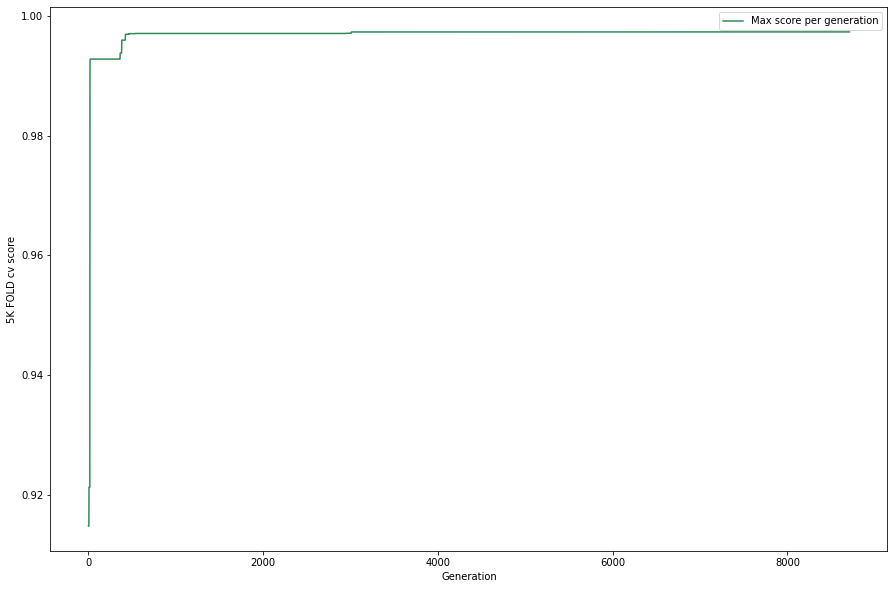

In [33]:
fig = ga_alg.plot_generations_scores()

In [34]:
fig.savefig('/content/svr_ga.pdf')